In [2]:
#여기 코드가 가장 중요하다. 위의 코드를 사용하면 matplot창을 띄워주고
# 아래의 코드를 사용하면 파이썬에서 첫번째 이미지만 보여준다.


%matplotlib qt

#%matplotlib inline

# 변환행렬

In [3]:
#행렬2
import numpy as np
import cv2


before1 = np.float32([[346, 621],[844,431],[643, 147],[167,91]])
after1 = np.float32([[145,436],[335,436],[335,277],[145,277]])
M1 = cv2.getPerspectiveTransform(before1,after1)

before2 = np.float32([[195,303],[100,500],[943,713],[981,175]])
after2 = np.float32([[283,275],[391,275],[391,41],[283,41]])
M2 = cv2.getPerspectiveTransform(before2,after2)

before3 = np.float32([[304,577],[730,719],[933,130],[530,200]])
after3 = np.float32([[336,436],[474,436],[474,275],[336,275]]) 
M3 = cv2.getPerspectiveTransform(before3,after3)


rotation1 = np.array([[ 0.84153417,  0.5261789 , -0.12229476],
       [-0.36541153,  0.72119683,  0.58851469],
       [ 0.3978626 , -0.45056731,  0.79918362]])




'''rotation1 = np.array([[ 0.70334418,  0.7091143 ,  0.04963737],
       [-0.58907751,  0.5423523 ,  0.59903396],
       [ 0.3978626 , -0.45056731,  0.79918362]])'''

rotation2 = np.array([[-0.65776376, -0.49832469, -0.56481796],
       [ 0.60387217, -0.79708118,  0.        ],
       [-0.45020577, -0.34107785,  0.82521553]])

rotation3 = np.array([[ 0.9051945 , -0.3087389 ,  0.29206712],
       [ 0.01429607,  0.70895141,  0.70511241],
       [-0.42475703, -0.63408847,  0.64615268]])

# 모델(yolov4) 로드 

In [4]:
#모델 yolo4
import tensorflow as tf
import os

def download_model(model_type):
    server_prefix = 'https://omnomnom.vision.rwth-aachen.de/data/metrabs'
    model_zippath = tf.keras.utils.get_file(
        origin=f'{server_prefix}/{model_type}.zip',
        extract=True, cache_subdir='models')
    model_path = os.path.join(os.path.dirname(model_zippath), model_type)
    return model_path

model = tf.saved_model.load(download_model('metrabs_rn18_y4'))
    

In [5]:
import cv2
image1 = cv2.imread('C:/Users/Leeyourack/jookyoung/image/area1/area1_1530.jpg')
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
pred1 = model.detect_poses(image1, skeleton='smpl_24')

# 함수

In [6]:
#draw
import cv2
def loop_through_people(frame ,keypoints_with,boxes_with,check):

    for person, box in zip(keypoints_with,boxes_with):
        a,b,c,d,per = box       
        if per > 0.50:    
            for xy in person:
                cv2.circle(frame,(int(xy[0]),int(xy[1])), 3, (0,255,0),-1)
                cv2.rectangle(frame,(int(a),int(b),int(c),int(d)),(255,0,0),2) 
                p = round(per,5)
                cv2.putText(frame,str(p),(int(a),int(b)),1,1,(0,255,0),2,cv2.LINE_AA)

# 이미지 구현

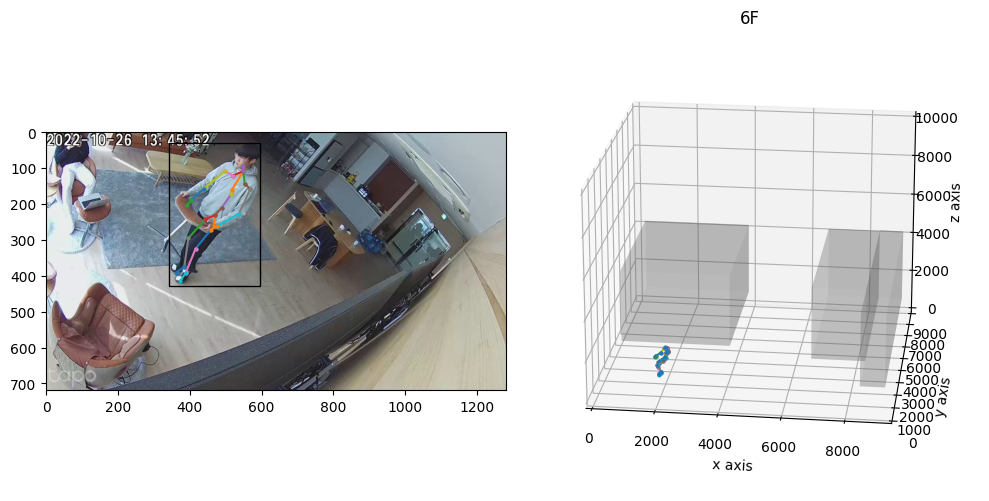

In [15]:
##1 이미지 테스트
import cv2
image1 = cv2.imread('C:/Users/Leeyourack/jookyoung/image/area1/area1_3213.jpg')
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
pred1 = model.detect_poses(image1, skeleton='smpl_24')

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from mpl_toolkits.mplot3d import Axes3D
import numpy as np 

def visualize(im, detections, poses3d, poses2d, edges):
    fig = plt.figure(figsize=(10,7))
    image_ax = fig.add_subplot(1, 2, 1)
    image_ax.imshow(image1)
    for x, y, w, h in detections[:, :4]:
        image_ax.add_patch(Rectangle((x, y), w, h, fill=False))
    

    pose_ax = fig.add_subplot(1, 2, 2, projection='3d')
    pose_ax.view_init(20, -83)
    pose_ax.set_xlim3d(0, 1030*9)
    pose_ax.set_zlim3d(0, 1114*9)
    pose_ax.set_ylim3d(0, 1000*9)

    a=[9,9,9]
    # x, y, z값 
    xpos = [0,720,918]
    ypos = [562,477,248]
    zpos = [0,0,0]

    transxpos= [a[i]*xpos[i] for i in range(len(a))]
    transypos= [a[i]*ypos[i] for i in range(len(a))]
    transzpos= [a[i]*zpos[i] for i in range(len(a))]

    # delta x, y, z 값
    dx = [407,198,90]
    dy = [553,630,866]
    dz = [400,400,400]
    transdx= [a[i]*dx[i] for i in range(len(a))]
    transdy= [a[i]*dy[i] for i in range(len(a))]
    transdz= [a[i]*dz[i] for i in range(len(a))]

    #그래프 만들기
    pose_ax.bar3d(transxpos,transypos,transzpos,transdx,transdy,transdz,'#7f7f7f',alpha=0.2) #,color='#00ceaa'(초록색) 기본값은 파란색
    pose_ax.set_title('6F')
    pose_ax.set_xlabel('x axis')
    pose_ax.set_ylabel('y axis')
    pose_ax.set_zlabel('z axis')

    



    # Matplotlib plots the Z axis as vertical, but our poses have Y as the vertical axis.
    # Therefore, we do a 90° rotation around the X axis:
    
    poses3d[..., 1], poses3d[..., 2] = poses3d[..., 2], -poses3d[..., 1] 
    a=np.ones(24)*(+200)
    b=np.ones(24)*(-1800)
    c=np.ones(24)*(+3000)
    shift=np.row_stack((a,b,c))


    for pose3d, pose2d in zip(poses3d, poses2d):
        
        pose3d=rotation1@pose3d.T
        pose3d=pose3d+shift

        for i_start, i_end in edges:
            image_ax.plot(*zip(pose2d[i_start], pose2d[i_end]), marker='o', markersize=2)
            pose_ax.plot(*zip(pose3d.T[i_start], pose3d.T[i_end]), marker='o', markersize=2)
        
        image_ax.scatter(*pose2d.T, s=2)
        pose_ax.scatter(*pose3d, s=2)

    fig.tight_layout()
    plt.show()

visualize(
    image1, 
    pred1['boxes'].numpy(),
    pred1['poses3d'].numpy(),
    pred1['poses2d'].numpy(),
    model.per_skeleton_joint_edges['smpl_24'].numpy())

# 영상 구현

In [ ]:
#5.3dmapping 

import cv2 
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
import pandas as pd
import datetime, time
from matplotlib.patches import Rectangle
from celluloid import Camera
import matplotlib.pyplot as plt


#영상 가져오기
cap1 = cv2.VideoCapture("C:/Users/Leeyourack/jookyoung/video/1.test_video/frame1.avi")


#영상 정보 출력
width = cap1.get(cv2.CAP_PROP_FRAME_WIDTH)
height = cap1.get(cv2.CAP_PROP_FRAME_HEIGHT)
count1 = cap1.get(cv2.CAP_PROP_FRAME_COUNT)
fps1 = cap1.get(cv2.CAP_PROP_FPS)



print('가로:', width)
print('세로:', height)
print('영상1의 총 프레임수:', count1)
print('영상1의 fps:', fps1)


frame=1
df=[]
box=[]


# 영상 출력
while True:
    ret1, frame1 = cap1.read()
    

    if frame%1==0:
        
        results1 = model.detect_poses(frame1, skeleton='smpl_24') #예측1
        unix_time = time.time()

        keypoints_with1 = results1['poses2d'].numpy()
        key3d1 = results1['poses3d'].numpy()
        boxes_1 = results1['boxes'].numpy()

        loop_through_people(frame1, keypoints_with1, boxes_1,frame) 
        
        cv2.putText(frame1,str(frame) , (800,200), cv2.FONT_HERSHEY_SIMPLEX, 5, (0,255,0),     2)
        
        ## 공간 생성
        %matplotlib qt
        #%matplotlib inline
        fig = plt.figure(figsize=(20, 10.4))     
        image_ax = fig.add_subplot(1,2, 1) 
        frame1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB)  
        image_ax.imshow(frame1)
        pose_ax = fig.add_subplot(1, 2, 2, projection='3d')

        ###각도 변경
        pose_ax.view_init(26,-70)#(90, 270)#

        pose_ax.set_xlim3d(0, 1030*10)
        pose_ax.set_zlim3d(0, 1114*10)
        pose_ax.set_ylim3d(0, 1000*10)

        a=[10,10,10]
        # x, y, z값 
        xpos = [0,720,918]
        ypos = [562,477,248]
        zpos = [0,0,0]

        transxpos= [a[i]*xpos[i] for i in range(len(a))]
        transypos= [a[i]*ypos[i] for i in range(len(a))]
        transzpos= [a[i]*zpos[i] for i in range(len(a))]

        # delta x, y, z 값
        dx = [407,198,90]
        dy = [553,630,866]
        dz = [200,200,200]
        transdx= [a[i]*dx[i] for i in range(len(a))]
        transdy= [a[i]*dy[i] for i in range(len(a))]
        transdz= [a[i]*dz[i] for i in range(len(a))]

        #그래프 만들기
        pose_ax.bar3d(transxpos,transypos,transzpos,transdx,transdy,transdz,'#7f7f7f',alpha=0.2)
        pose_ax.set_title('6F')
        pose_ax.set_xlabel('x axis')
        pose_ax.set_ylabel('y axis')
        pose_ax.set_zlabel('z axis')
        pose_ax.text(-6500, 5000,10, "area1", color='red')
        
        #[ 316.1       -186.625     5880.8      ]
        camera = Camera(fig)
       
        
        
        #########3d1###########
        poly_3dlist_1 = [(-9000,1000),(-3000,1000),(-3000,10000),(-9000,10000)]
        poly_3d_1 = Polygon(poly_3dlist_1)

        
        
        edges = model.per_skeleton_joint_edges['smpl_24'].numpy()

        key3d1[..., 1], key3d1[..., 2] = key3d1[..., 2], -key3d1[..., 1]
        a1=np.ones(24)*(+200)
        b1=np.ones(24)*(-1800)
        c1=np.ones(24)*(+3000)
        shift1=np.row_stack((a1,b1,c1))


       
        for pose3d_1, pose2d_1, box1 in zip(key3d1, keypoints_with1,boxes_1):   
            x, y, w, h, per = box1
            if per > 0.5:
                
                pose3d_1=rotation1@pose3d_1.T #회전
                pose3d_1=pose3d_1+shift1 #이동
    
                for i_start, i_end in edges:
                    pose_ax.plot(*zip(pose3d_1.T[i_start],pose3d_1.T[i_end]), marker='o', markersize=2)
                pose_ax.scatter(*pose3d_1, s=2)
                pose_ax.text(pose3d_1[0][14],pose3d_1[1][14],pose3d_1[2][14],"camera1",color = 'black')

                
                df.append([unix_time,frame,per,
                            pose3d_1[0][0],pose3d_1[0][1],pose3d_1[0][2],pose3d_1[0][3],pose3d_1[0][4],
                            pose3d_1[0][5],pose3d_1[0][6],pose3d_1[0][7],pose3d_1[0][8],pose3d_1[0][9],
                            pose3d_1[0][10],pose3d_1[0][11],pose3d_1[0][12],pose3d_1[0][13],pose3d_1[0][14],
                            pose3d_1[0][15],pose3d_1[0][16],pose3d_1[0][17],pose3d_1[0][18],pose3d_1[0][19],
                            pose3d_1[0][20],pose3d_1[0][21],pose3d_1[0][22],pose3d_1[0][23],

                            pose3d_1[1][0],pose3d_1[1][1],pose3d_1[1][2],pose3d_1[1][3],pose3d_1[1][4],
                            pose3d_1[1][5],pose3d_1[1][6],pose3d_1[1][7],pose3d_1[1][8],pose3d_1[1][9],
                            pose3d_1[1][10],pose3d_1[1][11],pose3d_1[1][12],pose3d_1[1][13],pose3d_1[1][14],
                            pose3d_1[1][15],pose3d_1[1][16],pose3d_1[1][17],pose3d_1[1][18],pose3d_1[1][19],
                            pose3d_1[1][20],pose3d_1[1][21],pose3d_1[1][22],pose3d_1[1][23],
                            
                            pose3d_1[2][0],pose3d_1[2][1],pose3d_1[2][2],pose3d_1[2][3],pose3d_1[2][4],
                            pose3d_1[2][5],pose3d_1[2][6],pose3d_1[2][7],pose3d_1[2][8],pose3d_1[2][9],
                            pose3d_1[2][10],pose3d_1[2][11],pose3d_1[2][12],pose3d_1[2][13],pose3d_1[2][14],
                            pose3d_1[2][15],pose3d_1[2][16],pose3d_1[2][17],pose3d_1[2][18],pose3d_1[2][19],
                            pose3d_1[2][20],pose3d_1[2][21],pose3d_1[2][22],pose3d_1[2][23]])
                
            


        df_frame= pd.DataFrame(df, columns=['unix_time','frame','percent','x0',
                                            'x1','x2','x3','x4','x5',
                                            'x6','x7','x8','x9','x10',
                                            'x11','x12','x13','x14','x15',
                                            'x16','x17','x18','x19','x20',
                                            'x21','x22','x23','y0',
                                            'y1','y2','y3','y4','y5',
                                            'y6','y7','y8','y9','y10',
                                            'y11','y12','y13','y14','y15',
                                            'y16','y17','y18','y19','y20',
                                            'y21','y22','y23','z0',
                                            'z1','z2','z3','z4','z5',
                                            'z6','z7','z8','z9','z10',
                                            'z11','z12','z13','z14','z15',
                                            'z16','z17','z18','z19','z20',
                                            'z21','z22','z23'])


        df_frame.to_csv('C:/Users/Leeyourack/jookyoung/data/df1.csv')
        
        
        

        


        
        plt.savefig('C:/Users/Leeyourack/jookyoung/image/3.detect_image/''3d'+str(frame)+'.jpg',)
        

            
            
        
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    
    frame = frame+1
    
    
cap1.release()

cv2.destroyAllWindows()  

# 1

